<a href="https://colab.research.google.com/github/sakanabil/Machine-Learning_25/blob/main/TG11_2341720108_SAKA_NABIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JS11 - Klasifikasi 2**

---

Praktikum 1

In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

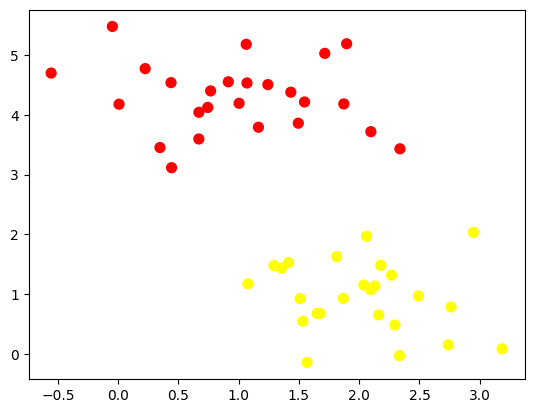

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

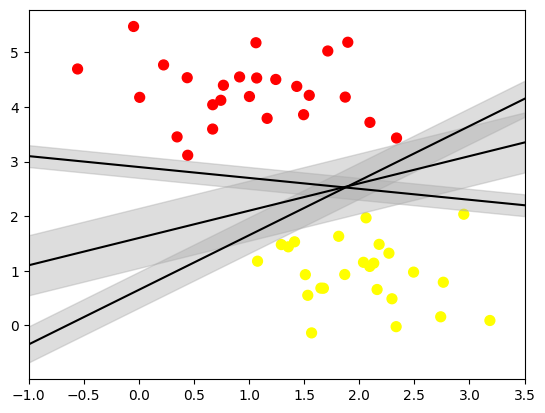

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

(-1.0, 3.5)

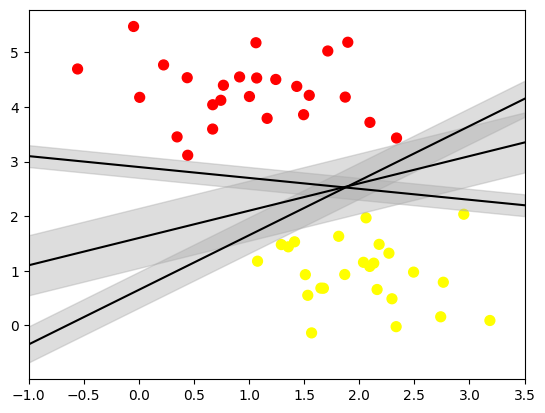

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

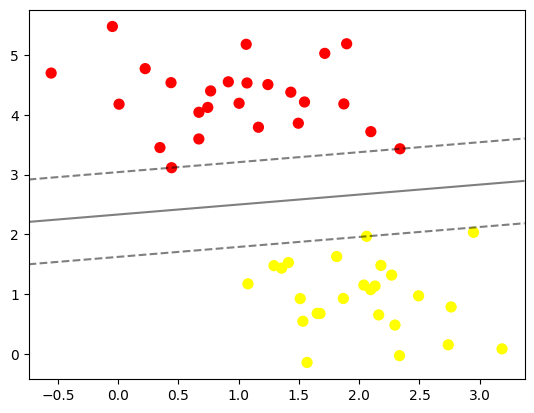

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

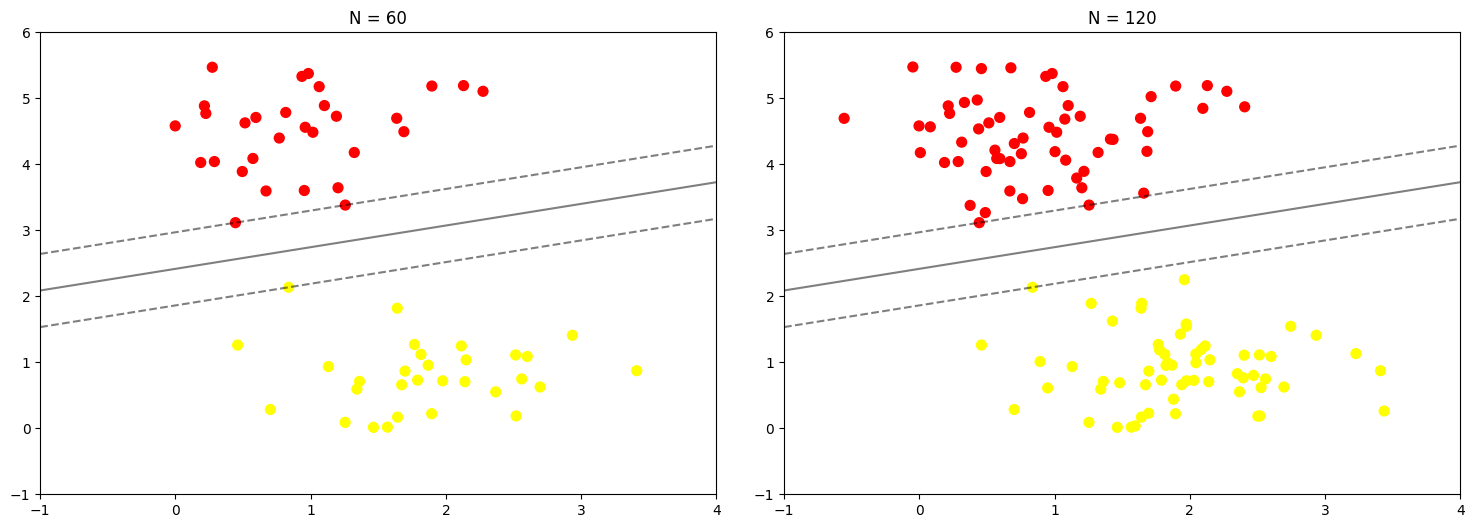

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [13]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

In [12]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


Praktikum 2

In [14]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

In [15]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

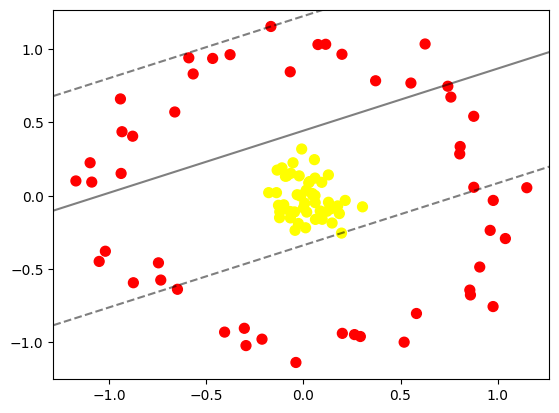

In [16]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [21]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 2.00480579e-01, -9.40233113e-01],
       [-9.24677714e-02,  1.32322480e-01],
       [-4.05457621e-01, -9.31679735e-01],
       [ 3.16379463e-02,  9.63150876e-02],
       [ 1.28678005e-01,  1.41798894e-01],
       [ 1.45848168e-02,  3.71473682e-02],
       [ 1.72090286e-02, -1.12006758e-01],
       [ 2.93199561e-01, -9.61726145e-01],
       [-6.48694071e-02,  1.52378874e-01],
       [ 9.77128893e-01, -3.23643911e-02],
       [-6.61817872e-01,  5.71545206e-01],
       [ 1.43344113e-01, -8.85924595e-02],
       [-8.74906417e-01, -5.94555771e-01],
       [ 2.63168316e-01, -9.48689917e-01],
       [-6.85506526e-02, -1.08012725e-01],
       [-1.00828028e-01, -6.24262744e-02],
       [ 1.03960788e+00, -2.92757599e-01],
       [ 8.77097648e-01,  5.73694973e-02],
       [ 1.76476064e-01, -6.99841908e-02],
       [ 5.98304514e-02,  7.32484739e-04],
       [ 1.14983413e+00,  5.43505314e-02],
       [ 2.75646532e-02,  8.79582384e-02],
       [ 1.47750229e-01, -1.86723133e-01],
       [ 1.29210568e-01, -4.49943181e-02],
       [ 9.07663554e-01, -4.87229976e-01],
       [-1.08906304e+00,  9.28618198e-02],
       [ 8.04647589e-01,  2.85135277e-01],
       [-8.67763885e-03,  3.18714663e-01],
       [ 8.06918124e-01,  3.35722843e-01],
       [-1.32385505e-02,  3.11875336e-03],
       [-4.28152326e-02, -2.36505106e-01],
       [-1.10230302e-01,  1.89914581e-01],
       [ 4.77961532e-02,  3.57891941e-03],
       [-6.47956491e-01, -6.39219872e-01],
       [ 3.71724570e-01,  7.84729292e-01],
       [ 2.15340632e-01, -3.23934677e-02],
       [ 1.96143086e-01, -2.55504902e-01],
       [-6.68673953e-02, -1.51755797e-01],
       [-4.66877919e-01,  9.37310810e-01],
       [-1.40850079e-02, -3.11911723e-03],
       [ 5.69268421e-02,  2.46108974e-01],
       [-6.76524230e-02,  8.45817341e-01],
       [-5.67144114e-01,  8.31326988e-01],
       [ 1.21675221e-01, -1.06159922e-01],
       [-3.83777314e-02, -1.13907774e+00],
       [-1.22627553e-01, -1.50327815e-01],
       [ 8.76707000e-01,  5.42096784e-01],
       [-1.10645710e-01, -8.46856054e-02],
       [-9.33449207e-01,  4.36810252e-01],
       [ 7.43416846e-01,  7.47364224e-01],
       [ 1.85159587e-01, -1.22247006e-01],
       [-1.21506889e-01, -1.10241004e-01],
       [-5.32803891e-02,  2.24777123e-01],
       [-9.41412631e-01,  6.60806433e-01],
       [ 7.59055866e-01,  6.73336127e-01],
       [-1.09752388e+00,  2.24810240e-01],
       [ 9.61349937e-01, -2.36888759e-01],
       [-2.58656887e-02, -1.89871397e-01],
       [ 5.18617237e-01, -1.00036727e+00],
       [ 9.76259419e-01, -7.57179695e-01],
       [-1.35025441e-01,  1.74639895e-01],
       [ 1.14556156e-02, -2.19247591e-01],
       [ 7.50323772e-02,  1.03214412e+00],
       [ 5.79533276e-04, -8.30907347e-02],
       [-1.67135618e-01,  1.15548934e+00],
       [ 6.20257732e-02, -1.61965995e-01],
       [ 8.65468016e-02, -1.04593006e-01],
       [-4.56455749e-02, -1.10927858e-01],
       [-3.03884236e-01, -9.05674089e-01],
       [-8.78567612e-01,  4.06141941e-01],
       [-3.19118964e-02,  6.53897069e-03],
       [ 6.26461786e-01,  1.03592729e+00],
       [-1.28078127e-01, -6.56834915e-02],
       [ 3.04305998e-01, -7.61677231e-02],
       [-2.14728227e-02,  1.35216175e-01],
       [-2.95331322e-01, -1.02372433e+00],
       [ 8.56596319e-01, -6.44705850e-01],
       [ 4.63929471e-02,  1.45309528e-02],
       [ 6.06871063e-02, -4.73613638e-02],
       [ 9.66935192e-02, -1.61201281e-01],
       [ 5.98137280e-02,  1.20253178e-01],
       [-9.38014512e-01,  1.51905956e-01],
       [ 1.98523738e-01,  9.65623103e-01],
       [-1.78481630e-01,  2.07206680e-02],
       [-1.01905106e+00, -3.79369110e-01],
       [ 9.45064087e-02,  9.11073100e-02],
       [ 1.14831774e-01,  1.03383593e+00],
       [-2.12921490e-01, -9.79865775e-01],
       [ 6.95969569e-03, -5.13123873e-02],
       [ 8.59862787e-01, -6.77886471e-01],
       [-8.50793521e-02,  1.35178964e-01],
       [-7.33900913e-01, -5.76207504e-01

In [22]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

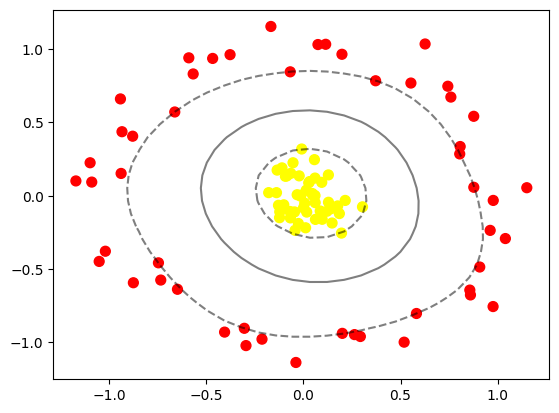

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Praktikum 3

In [24]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [25]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

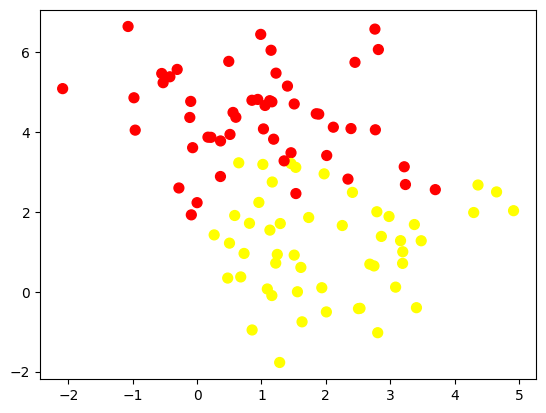

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

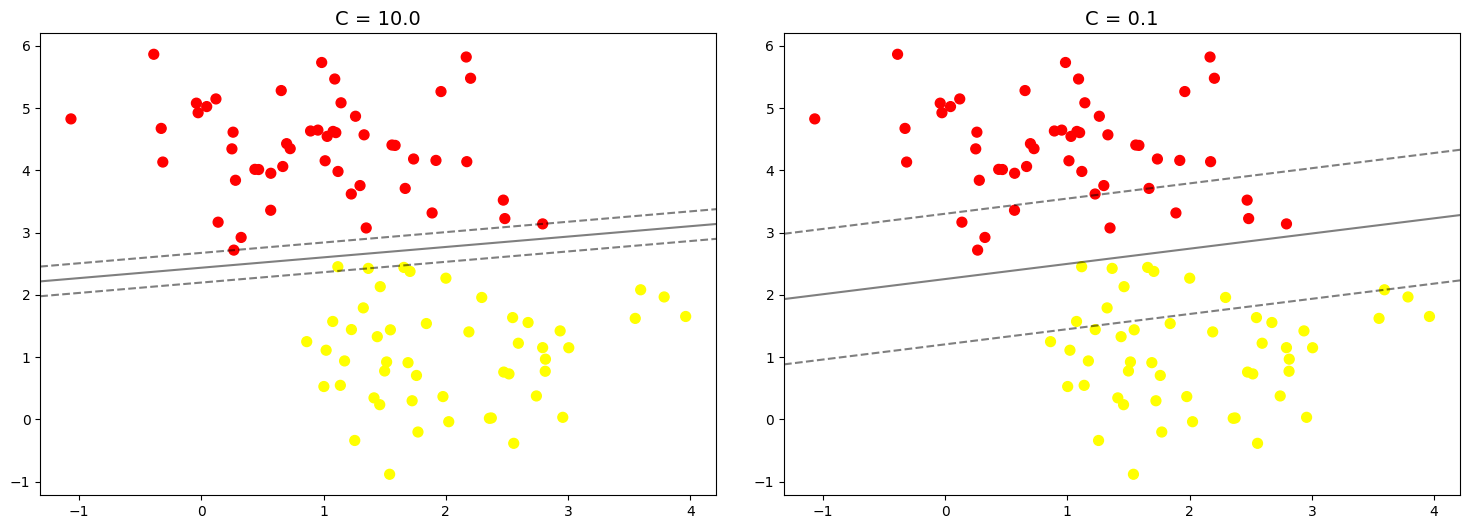

In [27]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Praktikum 4

In [28]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


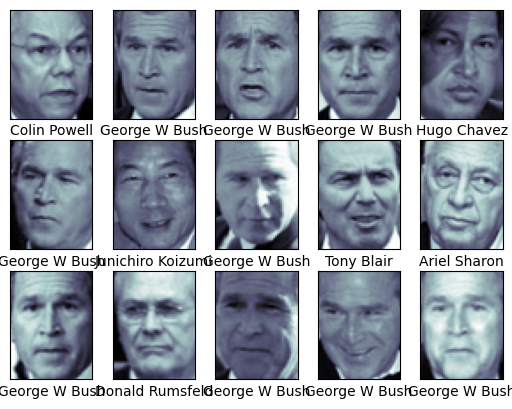

In [29]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [30]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

In [31]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 4s, sys: 404 ms, total: 2min 5s
Wall time: 1min 26s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [33]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

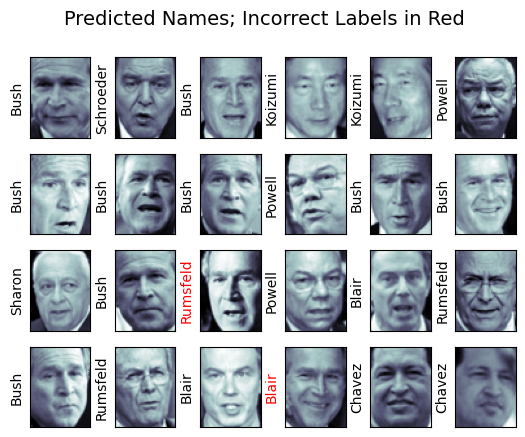

In [34]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

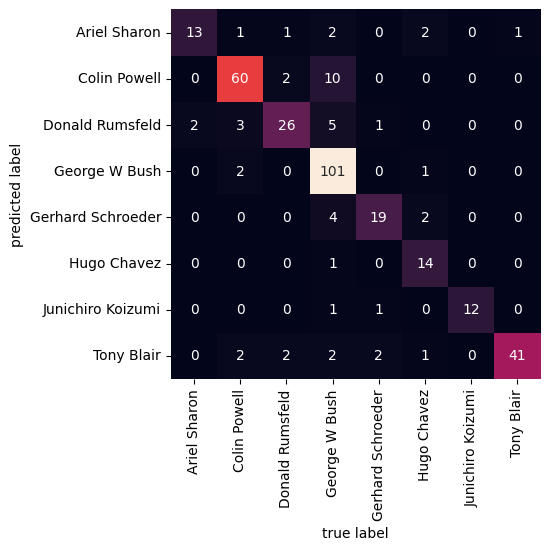

In [36]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Praktikum 5

In [41]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [37]:
# Image directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/images/training"
test_dir = "/content/drive/MyDrive/Colab Notebooks/images/test"

In [38]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [42]:
# Load training data
train_img = load_dataset(train_dir)

In [43]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[138, 184, 233],
         [138, 184, 233],
         [137, 183, 232],
         ...,
         [147, 190, 235],
         [147, 190, 235],
         [147, 190, 235]],
 
        [[143, 189, 238],
         [143, 189, 238],
         [143, 189, 238],
         ...,
         [149, 192, 237],
         [149, 192, 237],
         [150, 193, 238]],
 
        [[140, 186, 235],
         [140, 186, 235],
         [140, 186, 235],
         ...,
         [146, 189, 234],
         [146, 189, 234],
         [146, 189, 234]],
 
        ...,
 
        [[105, 100,  94],
         [ 94,  89,  83],
         [114, 110, 101],
         ...,
         [ 86,  86,  96],
         [ 86,  86,  96],
         [ 86,  86,  96]],
 
        [[ 96,  89,  83],
         [ 98,  91,  85],
         [107, 100,  92],
         ...,
         [ 89,  89, 101],
         [ 90,  90, 102],
         [ 87,  87,  99]],
 
        [[ 95,  88,  82],
         [ 96,  89,  83],
         [101,  94,  86],
         ...,
         [ 89,  89, 101],
  

In [44]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 58
(439, 640, 3)


In [45]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (372, 640, 3)
Label	: night


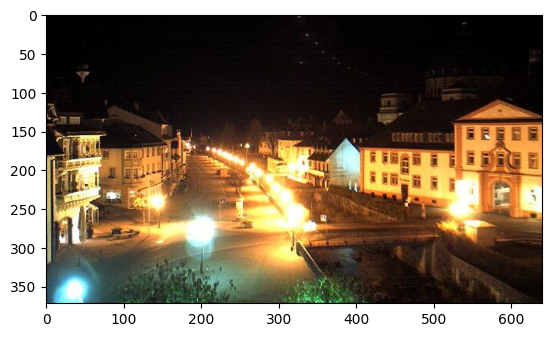

In [46]:
random_img_viz(train_img)

In [47]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [48]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [49]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [50]:
train_std_img_list = preprocess(train_img)

In [51]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 224
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


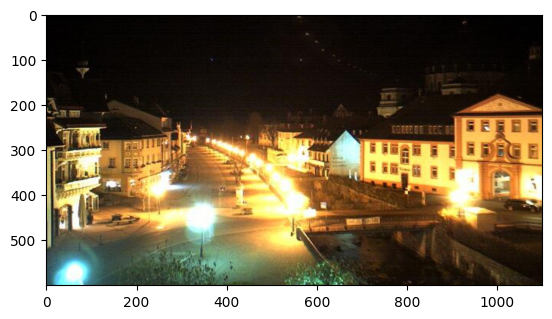

In [53]:
random_img_viz(train_std_img_list)

In [54]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 56
Avg Brighness: 118.6370


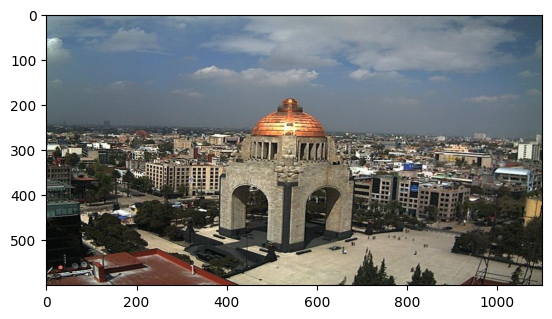

In [55]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [56]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 47
Actual label: 1
Predicted label: 0


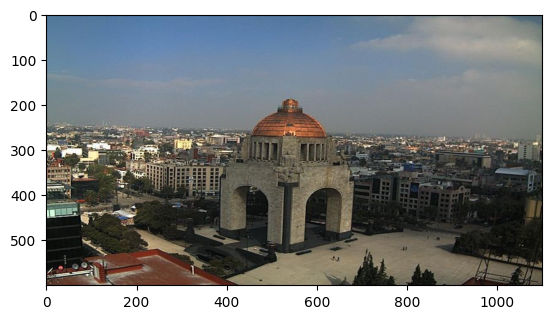

In [57]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [58]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [59]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [60]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [61]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [62]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,198.095558,1.0
1,103.307636,1.0
2,195.457092,1.0
3,175.092992,1.0
4,199.749191,1.0


In [63]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,21.545995,0.0
1,86.269774,0.0
2,176.830915,0.0
3,34.766211,0.0
4,13.765597,0.0


In [64]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [65]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


Tugas Praktikum

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

In [68]:
# ---------------------------------------------------------------------------
# 1. Memuat dan Mempersiapkan Data
# ---------------------------------------------------------------------------
try:
    file_path = '/content/voice.csv'
    df = pd.read_csv(file_path)

    # Encoding label 'male'/'female' menjadi 1/0
    encoder = LabelEncoder()
    df['label'] = encoder.fit_transform(df['label']) # 0 = female, 1 = male

    # Pisahkan fitur (X) dan target (y)
    X = df.drop('label', axis=1)
    y = df['label']

    print(f"Data voice.csv dimuat. Bentuk: {X.shape}")

    # ---------------------------------------------------------------------------
    # 2. Definisi Skenario Uji Coba
    # ---------------------------------------------------------------------------
    # Kita akan menguji 2 rasio split dan 3 kernel
    split_ratios = [0.3, 0.2] # 0.3 -> 70:30, 0.2 -> 80:20
    kernels = ['linear', 'poly', 'rbf']

    # List untuk menyimpan hasil
    results = []

    # ---------------------------------------------------------------------------
    # 3. Looping Skenario
    # ---------------------------------------------------------------------------

    for test_size in split_ratios:
        split_name = f"{(1-test_size)*100:.0f}:{(test_size)*100:.0f}"
        print(f"\n--- Menguji Split {split_name} ---")

        # 1. Split Data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

        # 2. Feature Scaling (SANGAT PENTING untuk SVM)
        # Scaler di-fit HANYA pada data latih
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        # Data uji HANYA di-transform
        X_test_scaled = scaler.transform(X_test)

        # 3. Loop Kernel
        for kernel_name in kernels:
            start_time = time.time()
            print(f"Melatih SVM dengan kernel: {kernel_name}...")

            # 4. Inisialisasi dan Latih Model
            # Kita gunakan random_state untuk konsistensi
            model = SVC(kernel=kernel_name, random_state=42)
            model.fit(X_train_scaled, y_train)

            # 5. Prediksi dan Evaluasi
            y_pred = model.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)

            end_time = time.time()
            duration = end_time - start_time

            # 6. Simpan Hasil
            results.append({
                'Split Ratio': split_name,
                'Kernel': kernel_name,
                'Accuracy': accuracy,
                'Training Time (s)': duration
            })

            print(f"Selesai. Akurasi: {accuracy:.4f} (Waktu: {duration:.2f} d)")

    # ---------------------------------------------------------------------------
    # 4. Tabulasi Hasil
    # ---------------------------------------------------------------------------
    print("\n--- Tabulasi Performansi SVM ---")

    results_df = pd.DataFrame(results)

    # Mengatur 'Accuracy' untuk 4 desimal
    results_df['Accuracy'] = results_df['Accuracy'].map(lambda x: f"{x:.4f}")
    # Mengatur 'Training Time' untuk 2 desimal
    results_df['Training Time (s)'] = results_df['Training Time (s)'].map(lambda x: f"{x:.2f}")

    print(results_df.to_string(index=False))
    print("---------------------------------")


except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

Data voice.csv dimuat. Bentuk: (3168, 20)

--- Menguji Split 70:30 ---
Melatih SVM dengan kernel: linear...
Selesai. Akurasi: 0.9790 (Waktu: 0.08 d)
Melatih SVM dengan kernel: poly...
Selesai. Akurasi: 0.9600 (Waktu: 0.15 d)
Melatih SVM dengan kernel: rbf...
Selesai. Akurasi: 0.9832 (Waktu: 0.11 d)

--- Menguji Split 80:20 ---
Melatih SVM dengan kernel: linear...
Selesai. Akurasi: 0.9748 (Waktu: 0.08 d)
Melatih SVM dengan kernel: poly...
Selesai. Akurasi: 0.9558 (Waktu: 0.25 d)
Melatih SVM dengan kernel: rbf...
Selesai. Akurasi: 0.9826 (Waktu: 0.23 d)

--- Tabulasi Performansi SVM ---
Split Ratio Kernel Accuracy Training Time (s)
      70:30 linear   0.9790              0.08
      70:30   poly   0.9600              0.15
      70:30    rbf   0.9832              0.11
      80:20 linear   0.9748              0.08
      80:20   poly   0.9558              0.25
      80:20    rbf   0.9826              0.23
---------------------------------


Analisis Hasil:

Kernel Terbaik: Kernel RBF (Radial Basis Function) secara konsisten memberikan akurasi tertinggi pada kedua rasio split (98.32% pada 70:30 dan 98.26% pada 80:20). Ini menunjukkan bahwa data kemungkinan besar tidak dapat dipisahkan secara sempurna oleh garis lurus (linear) dan memerlukan batas keputusan yang lebih kompleks yang disediakan oleh RBF.

Performa Kernel Lain:

Kernel linear memiliki performa sangat baik (sekitar 97.5% - 97.9%), menunjukkan bahwa data ini sebagian besar linearly separable.

Kernel poly (polynomial) secara konsisten memberikan akurasi terendah (96.0% dan 95.6%) dan membutuhkan waktu latihan paling lama.

Pengaruh Split Ratio: Perbedaan antara split 70:30 dan 80:20 sangat kecil. Akurasi tertinggi ditemukan pada split 70:30 (data latih 70%), namun perbedaannya (0.0006) tidak signifikan secara statistik.

In [69]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import time

In [72]:
# --- 1. Definisi Fungsi Ekstraksi Fitur Histogram ---

def extract_histogram(image_path, bins=(8, 8, 8)):
    """
    Membaca gambar, mengubahnya ke HSV, menghitung histogram 3D (Hue, Saturation, Value),
    menormalisasi, dan meratakannya (flatten) menjadi vektor fitur 1D.
    """
    try:
        # Membaca gambar
        image = cv2.imread(image_path)
        if image is None:
            print(f"Peringatan: Tidak dapat membaca gambar {image_path}")
            return None

        # Konversi ke HSV (ruang warna yang lebih baik untuk histogram)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Hitung histogram 3D.
        # Kita gunakan 'bins' (misal 8x8x8 = 512 fitur)
        hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])

        # Normalisasi histogram (penting untuk SVM)
        cv2.normalize(hist, hist)

        # 'Flatten' histogram menjadi 1D array
        return hist.flatten()
    except Exception as e:
        print(f"Error memproses {image_path}: {e}")
        return None

# --- 2. Definisi Fungsi untuk Memuat Data dari Folder ---

def load_data_from_dirs(base_dir):
    """
    Memuat semua gambar dari sub-folder 'siang' dan 'malam'
    di dalam direktori 'base_dir', lalu mengekstrak histogramnya.
    """
    features = []
    labels = []
    categories = ['day', 'night']

    for category in categories:
        path = os.path.join(base_dir, category)
        if not os.path.isdir(path):
            print(f"Error: Direktori tidak ditemukan: {path}")
            continue

        print(f"Memproses folder: {path}")
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)

            # Ekstrak histogram
            histogram = extract_histogram(img_path)

            if histogram is not None:
                features.append(histogram)
                labels.append(category)

    return np.array(features), np.array(labels)

# --- 3. Main Script ---

# Direktori berdasarkan struktur yang Anda berikan
train_dir = "/content/drive/MyDrive/Colab Notebooks/images/training"
test_dir = "/content/drive/MyDrive/Colab Notebooks/images/test"

# --- Memuat Data Latih dan Uji ---
print("Memulai memuat data latih...")
X_train, y_train = load_data_from_dirs(train_dir)

print("\nMemulai memuat data uji...")
X_test, y_test = load_data_from_dirs(test_dir)

if len(X_train) == 0 or len(X_test) == 0:
    print("\nError: Data latih atau data uji tidak berhasil dimuat.")
    print("Pastikan path direktori Anda (train_dir, test_dir) sudah benar dan berisi folder 'siang' dan 'malam'.")
else:
    print(f"\nData berhasil dimuat.")
    print(f"Total data latih: {len(X_train)} sampel")
    print(f"Total data uji: {len(X_test)} sampel")
    print(f"Total fitur per sampel (bins): {X_train.shape[1]}") # Akan jadi 512 jika bins=(8,8,8)

    # --- Encoding Label (String ke Angka) ---
    # Mengubah 'siang'/'malam' menjadi 0/1
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)

    # --- Hyperparameter Tuning (Eksperimen) ---
    print("\nMemulai Hyperparameter Tuning dengan GridSearchCV...")
    print("Ini mungkin memakan waktu beberapa menit...")

    # Parameter yang akan diuji untuk kernel RBF
    # C: Parameter regularisasi.
    # gamma: Koefisien kernel.
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001]
    }

    # Inisialisasi model SVM dengan kernel RBF
    svm = SVC(kernel='rbf')

    # Inisialisasi GridSearchCV
    # cv=5 berarti 5-fold cross-validation
    grid_search = GridSearchCV(svm, param_grid, cv=5, verbose=2, n_jobs=-1)

    start_tune = time.time()
    # Latih GridSearchCV pada data latih
    grid_search.fit(X_train, y_train)
    end_tune = time.time()

    print(f"\nTuning selesai dalam {end_tune - start_tune:.2f} detik.")

    # --- 4. Evaluasi Model ---

    # Tampilkan parameter terbaik
    print(f"\nParameter terbaik ditemukan: {grid_search.best_params_}")

    # Ambil model terbaik
    best_model = grid_search.best_estimator_

    # Lakukan prediksi pada data uji
    y_pred = best_model.predict(X_test)

    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    print("\n--- Hasil Performa pada Data Uji ---")
    print(f"Akurasi: {accuracy * 100:.2f}%")

    # Tampilkan laporan klasifikasi (precision, recall, f1-score)
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Memulai memuat data latih...
Memproses folder: /content/drive/MyDrive/Colab Notebooks/images/training/day
Memproses folder: /content/drive/MyDrive/Colab Notebooks/images/training/night

Memulai memuat data uji...
Memproses folder: /content/drive/MyDrive/Colab Notebooks/images/test/day
Memproses folder: /content/drive/MyDrive/Colab Notebooks/images/test/night

Data berhasil dimuat.
Total data latih: 240 sampel
Total data uji: 160 sampel
Total fitur per sampel (bins): 512

Memulai Hyperparameter Tuning dengan GridSearchCV...
Ini mungkin memakan waktu beberapa menit...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Tuning selesai dalam 3.73 detik.

Parameter terbaik ditemukan: {'C': 1, 'gamma': 1}

--- Hasil Performa pada Data Uji ---
Akurasi: 98.75%

Laporan Klasifikasi:
              precision    recall  f1-score   support

         day       0.99      0.99      0.99        80
       night       0.99      0.99      0.99        80

    accuracy                           0.